In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import utils as ut
from scipy.interpolate import make_interp_spline


In [3]:
ENERGY_PATH = '/net/pc200256/nobackup/users/most/output/LENTIS_2023_PD/agg_production/per_country/'
PATH_ED = '../../energydroughts-Europe/data/'
VARIABLE = 'residual'
RUNNAME = 'LENTIS_2023_PD'

ed = pd.read_csv(os.path.join(PATH_ED, 'netto_demand_el7_winter_LENTIS_2023_PD_1600_events.csv')).reset_index(drop=True)
ed['run'] = ed['runs'].str.extract('(\d+)').astype(int)
df_events = ed.drop(['Unnamed: 0', 'runs'], axis = 1)

In [4]:
data = ut.load_data(ENERGY_PATH, VARIABLE, RUNNAME, stacked = False)
COUNTRY_NR = data.country.values
COUNTRY_NAME = data.country_name.values
country_nr_name = dict(zip(COUNTRY_NR, COUNTRY_NAME))
country_name_nr  = dict(zip(COUNTRY_NAME, COUNTRY_NR))

Text(0, 0.5, 'Residual load [MWh]')

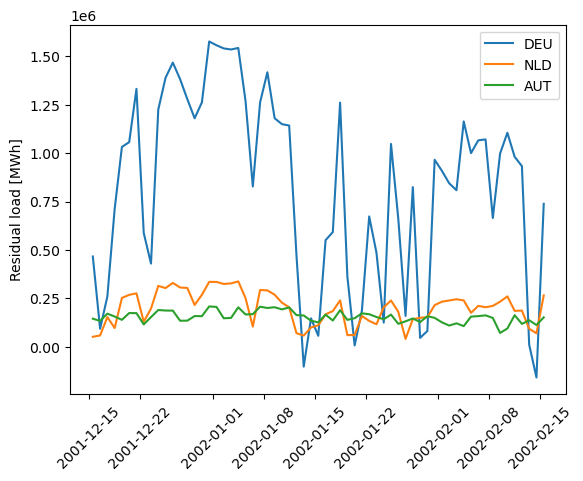

In [10]:
timeslice = pd.date_range('2001-12-15T12:00:00.000000000', '2002-02-15T12:00:00.000000000')
runname = 'h153'

data_DEU = data.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_NLD = data.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_AUT = data.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

plt.plot(data_DEU.time, data_DEU, label = "DEU")
plt.plot(data_NLD.time, data_NLD, label = "NLD")
plt.plot(data_AUT.time, data_AUT, label = "AUT")
plt.xticks(rotation = 45)
plt.legend()
plt.ylabel('Residual load [MWh]')

(0.0, 1.0)

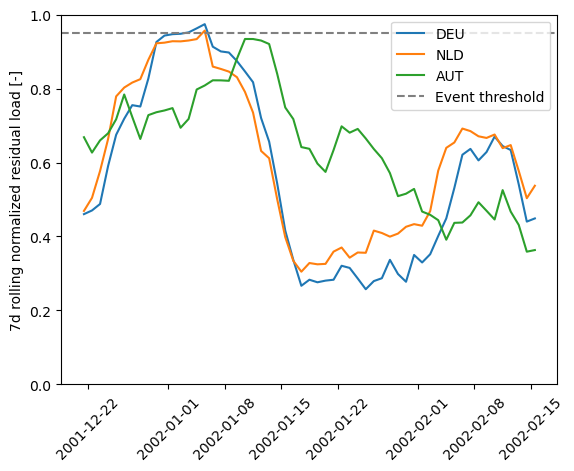

In [11]:
data_rank = data.rank(dim = 'time', pct = True)
data_rank_DEU = data_rank.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_rank_NLD = data_rank.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_rank_AUT = data_rank.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

plt.plot(data_rank_DEU.time, data_rank_DEU.rolling(time = 7, center = False).mean(), label = "DEU")
plt.plot(data_rank_NLD.time, data_rank_NLD.rolling(time = 7, center = False).mean(), label = "NLD")
plt.plot(data_rank_AUT.time, data_rank_AUT.rolling(time = 7, center = False).mean(), label = "AUT")
plt.axhline(0.95, color = 'grey', linestyle = '--', label = 'Event threshold')
plt.ylabel('7d rolling normalized residual load [-]')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.ylim(0, 1)

In [15]:
data_rank = data.rolling(time = 7, center = False).mean().rank(dim = 'time', pct = True)
data_rank_DEU = data_rank.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_rank_NLD = data_rank.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_rank_AUT = data_rank.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

### Made-up data

In [132]:
NLD = np.array([0.07250608, 0.07445255, 0.09927007, 0.09586375, 0.12457421,
       0.25790754, 0.41654501, 0.50705596, 0.65498783, 0.8107056 ,
       0.9270073 , 0.95425791, 0.96399027, 0.97372263, 0.98734793,
       0.99416058, 1.03513382, 0.99805353, 0.99756691, 0.98902676,
       0.99951338, 0.97        , 0.96270073, 0.94783455, 0.92248175,
       0.8882968, 0.88527981, 0.87688564, 0.74695864, 0.70121655,
       0.68759124, 0.68413625, 0.72751825, 0.64761557, 0.7107056 ,
       0.82708029, 0.65145985, 0.585158151, 0.546958637, 0.3296837 ,
       0.34379562, 0.24282238, 0.35231144, 0.33576642, 0.31873479,
       0.33527981, 0.36593674, 0.45615572, 0.55982968, 0.62406326,
       0.6622871 , 0.55155718, 0.53004866, 0.44065693, 0.42189781,
       0.33194647, 0.329513382, 0.43167883, 0.5649635 , 0.57274939,
       0.65742092, 0.51240876, 0.57323601])

DEU = np.array([0.42919708, 0.37128954, 0.31873479, 0.30754258, 0.29051095,
       0.32019465, 0.39075426, 0.41119221, 0.46715328, 0.66423358,
       0.81313869, 0.88321168, 0.91873479, 0.91484185, 0.9649635 ,
       0.94783455, 0.9946472 , 0.99708029, 0.99805353, 1.02902676,
       0.99951338, 1.035        , 0.99854015, 0.95416058, 0.93172749,
       0.92540146, 0.88518248, 0.82571776, 0.87493917, 0.69829684,
       0.46666667, 0.24963504, 0.16982968, 0.11046229, 0.11970803,
       0.11143552, 0.11922141, 0.12554745, 0.19805353, 0.18832117,
       0.13187348, 0.11532847, 0.13965937, 0.15815085, 0.24184915,
       0.15863747, 0.11727494, 0.21654501, 0.20194647, 0.2243309 ,
       0.31094891, 0.36836983, 0.53138686, 0.74403893, 0.77226277,
       0.71970803, 0.74987835, 0.81654501, 0.77712895, 0.75961071,
       0.52944039, 0.32116788, 0.33333333])

AUT = np.array([0.89878345, 0.83698297, 0.7216545 , 0.69148418,
       0.62676399, 0.64476886, 0.66180049, 0.65742092, 0.69975669,
       0.71873479, 0.72652068, 0.66569343, 0.70656934, 0.74841849,
       0.8136253 , 0.78148418, 0.65335766, 0.62890511, 0.72260341,
       0.65038929, 0.72201946, 0.68170316, 0.73649635, 0.7277372,
       0.73, 0.72, 0.75, 0.68, 0.9,
       0.9425791, 0.9155718, 0.9682968, 0.98588321, 0.98399027,
       0.98978102, 0.99854015, 0.99756691, 0.99708029, 0.99610706,
       0.97956204, 0.89878345, 0.83698297, 0.7216545 , 0.69148418,
       0.64574209, 0.62092457, 0.68905109, 0.78004866, 0.75717762,
       0.77128954, 0.72068127, 0.6783455 , 0.6486618 , 0.59805353,
       0.51435523, 0.5270073 , 0.53673966, 0.45839416, 0.43649635,
       0.4729927 , 0.37810219, 0.32311436, 0.45206813])

(0.0, 60.0)

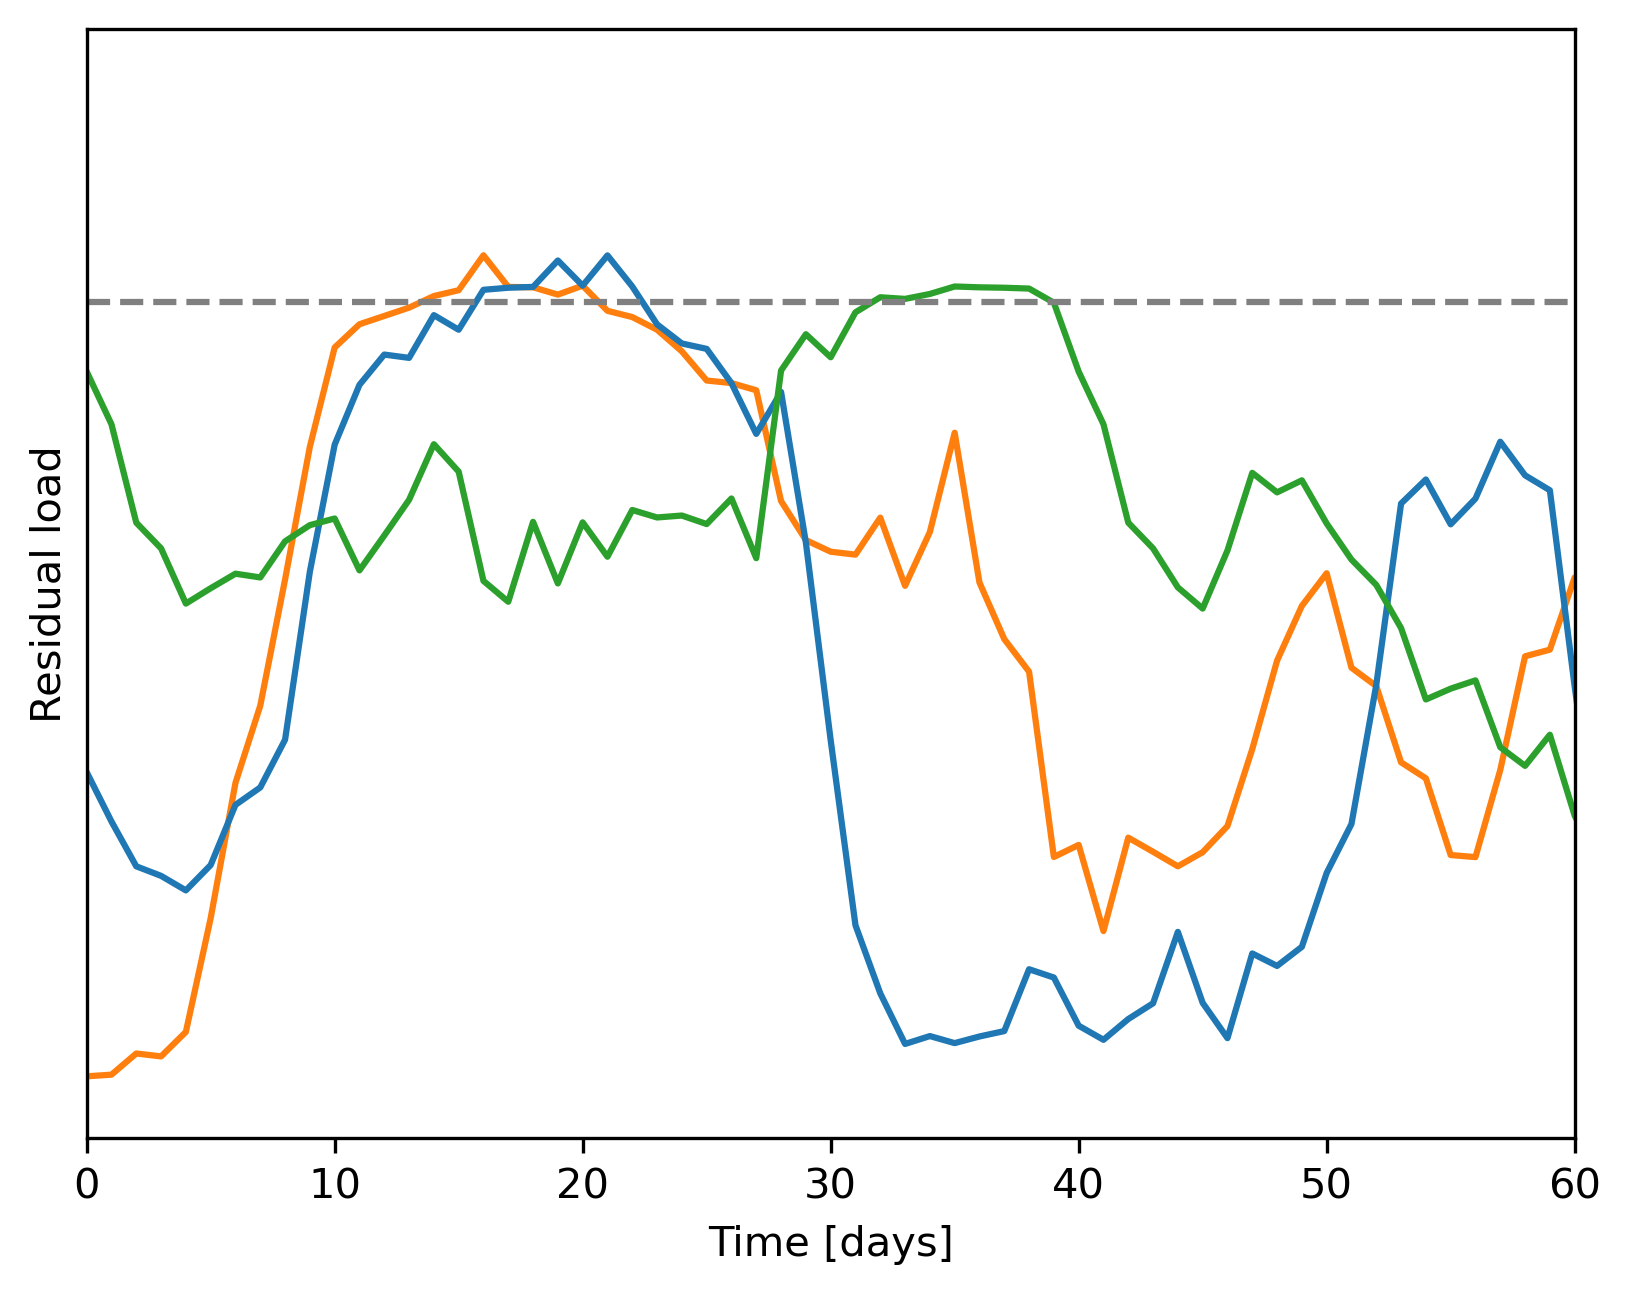

In [138]:
plt.figure(dpi = 300)
t = np.arange(len(timeslice))
plt.plot(t, NLD, label = "Country X", color = "C1")
plt.plot(t, DEU, label = "Country Y", color = "C0")
plt.plot(t, AUT, label = "Country Z", color = "C2")
plt.axhline(0.98, color = 'grey', linestyle = '--', label = 'ED threshold')
plt.ylabel('Residual load')
plt.yticks([])
plt.ylim(0, 1.3)
plt.xlabel('Time [days]')
# Add annotations

#plt.annotate('Co-occurring ED X & Y', xy=(18, 1.07), ha='center', va='bottom')
#plt.annotate('Disjoint ED Z', xy=(35, 1.03), ha='center', va='bottom')

def add_bracket(x1, x2, y, text, color):
    plt.annotate('', xy=(x1, y), xytext=(x2, y),
                 arrowprops=dict(color = color, arrowstyle='<->', lw=1))
    
    # plt.annotate(text, xy=((x1+x2)/2, y), xytext=(0, 0), 
    #              textcoords='offset points', ha='center', va='bottom')

# Add brackets
# add_bracket(13, 21.5, 1.02, 'ED Y', 'C1')
# add_bracket(15, 23, 1.04, 'ED X', 'C0')
# add_bracket(31, 39.5, 1.02, 'ED Z', 'C2')
plt.xlim(0,60)

#plt.text(18, 1.07, r"$\bf{Co-occurring}$ energy \n droughts in X and Y", size=8)
# plt.axvspan(15.5, 21, color='red', alpha=0.3, label='Co-occurring Drought')
# plt.axvspan(31.5, 39, color='lightblue', alpha=0.3, label='Disjoint Drought')